In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [20]:
df = pd.read_csv('Organics.xlsx - Organics.csv')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [22]:
df1 = df.drop(['ID'],axis=1)
df1.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [23]:
df1.shape

(22223, 12)

In [24]:
df1.isnull().sum()

DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [25]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 7 numerical variables

The numerical variables : ['DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime', 'TargetBuy', 'TargetAmt']


In [26]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 5 categorical variables

The categorical variables : ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']


In [27]:
df1[numerical].nunique()

DemAffl         33
DemAge          62
DemCluster      55
PromSpend     2606
PromTime        39
TargetBuy        2
TargetAmt        4
dtype: int64

In [28]:
df1[numerical].isnull().sum()

DemAffl       1085
DemAge        1508
DemCluster     674
PromSpend        0
PromTime       281
TargetBuy        0
TargetAmt        0
dtype: int64

array([[<AxesSubplot: title={'center': 'DemAffl'}>,
        <AxesSubplot: title={'center': 'DemAge'}>,
        <AxesSubplot: title={'center': 'DemCluster'}>],
       [<AxesSubplot: title={'center': 'PromSpend'}>,
        <AxesSubplot: title={'center': 'PromTime'}>,
        <AxesSubplot: title={'center': 'TargetBuy'}>],
       [<AxesSubplot: title={'center': 'TargetAmt'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

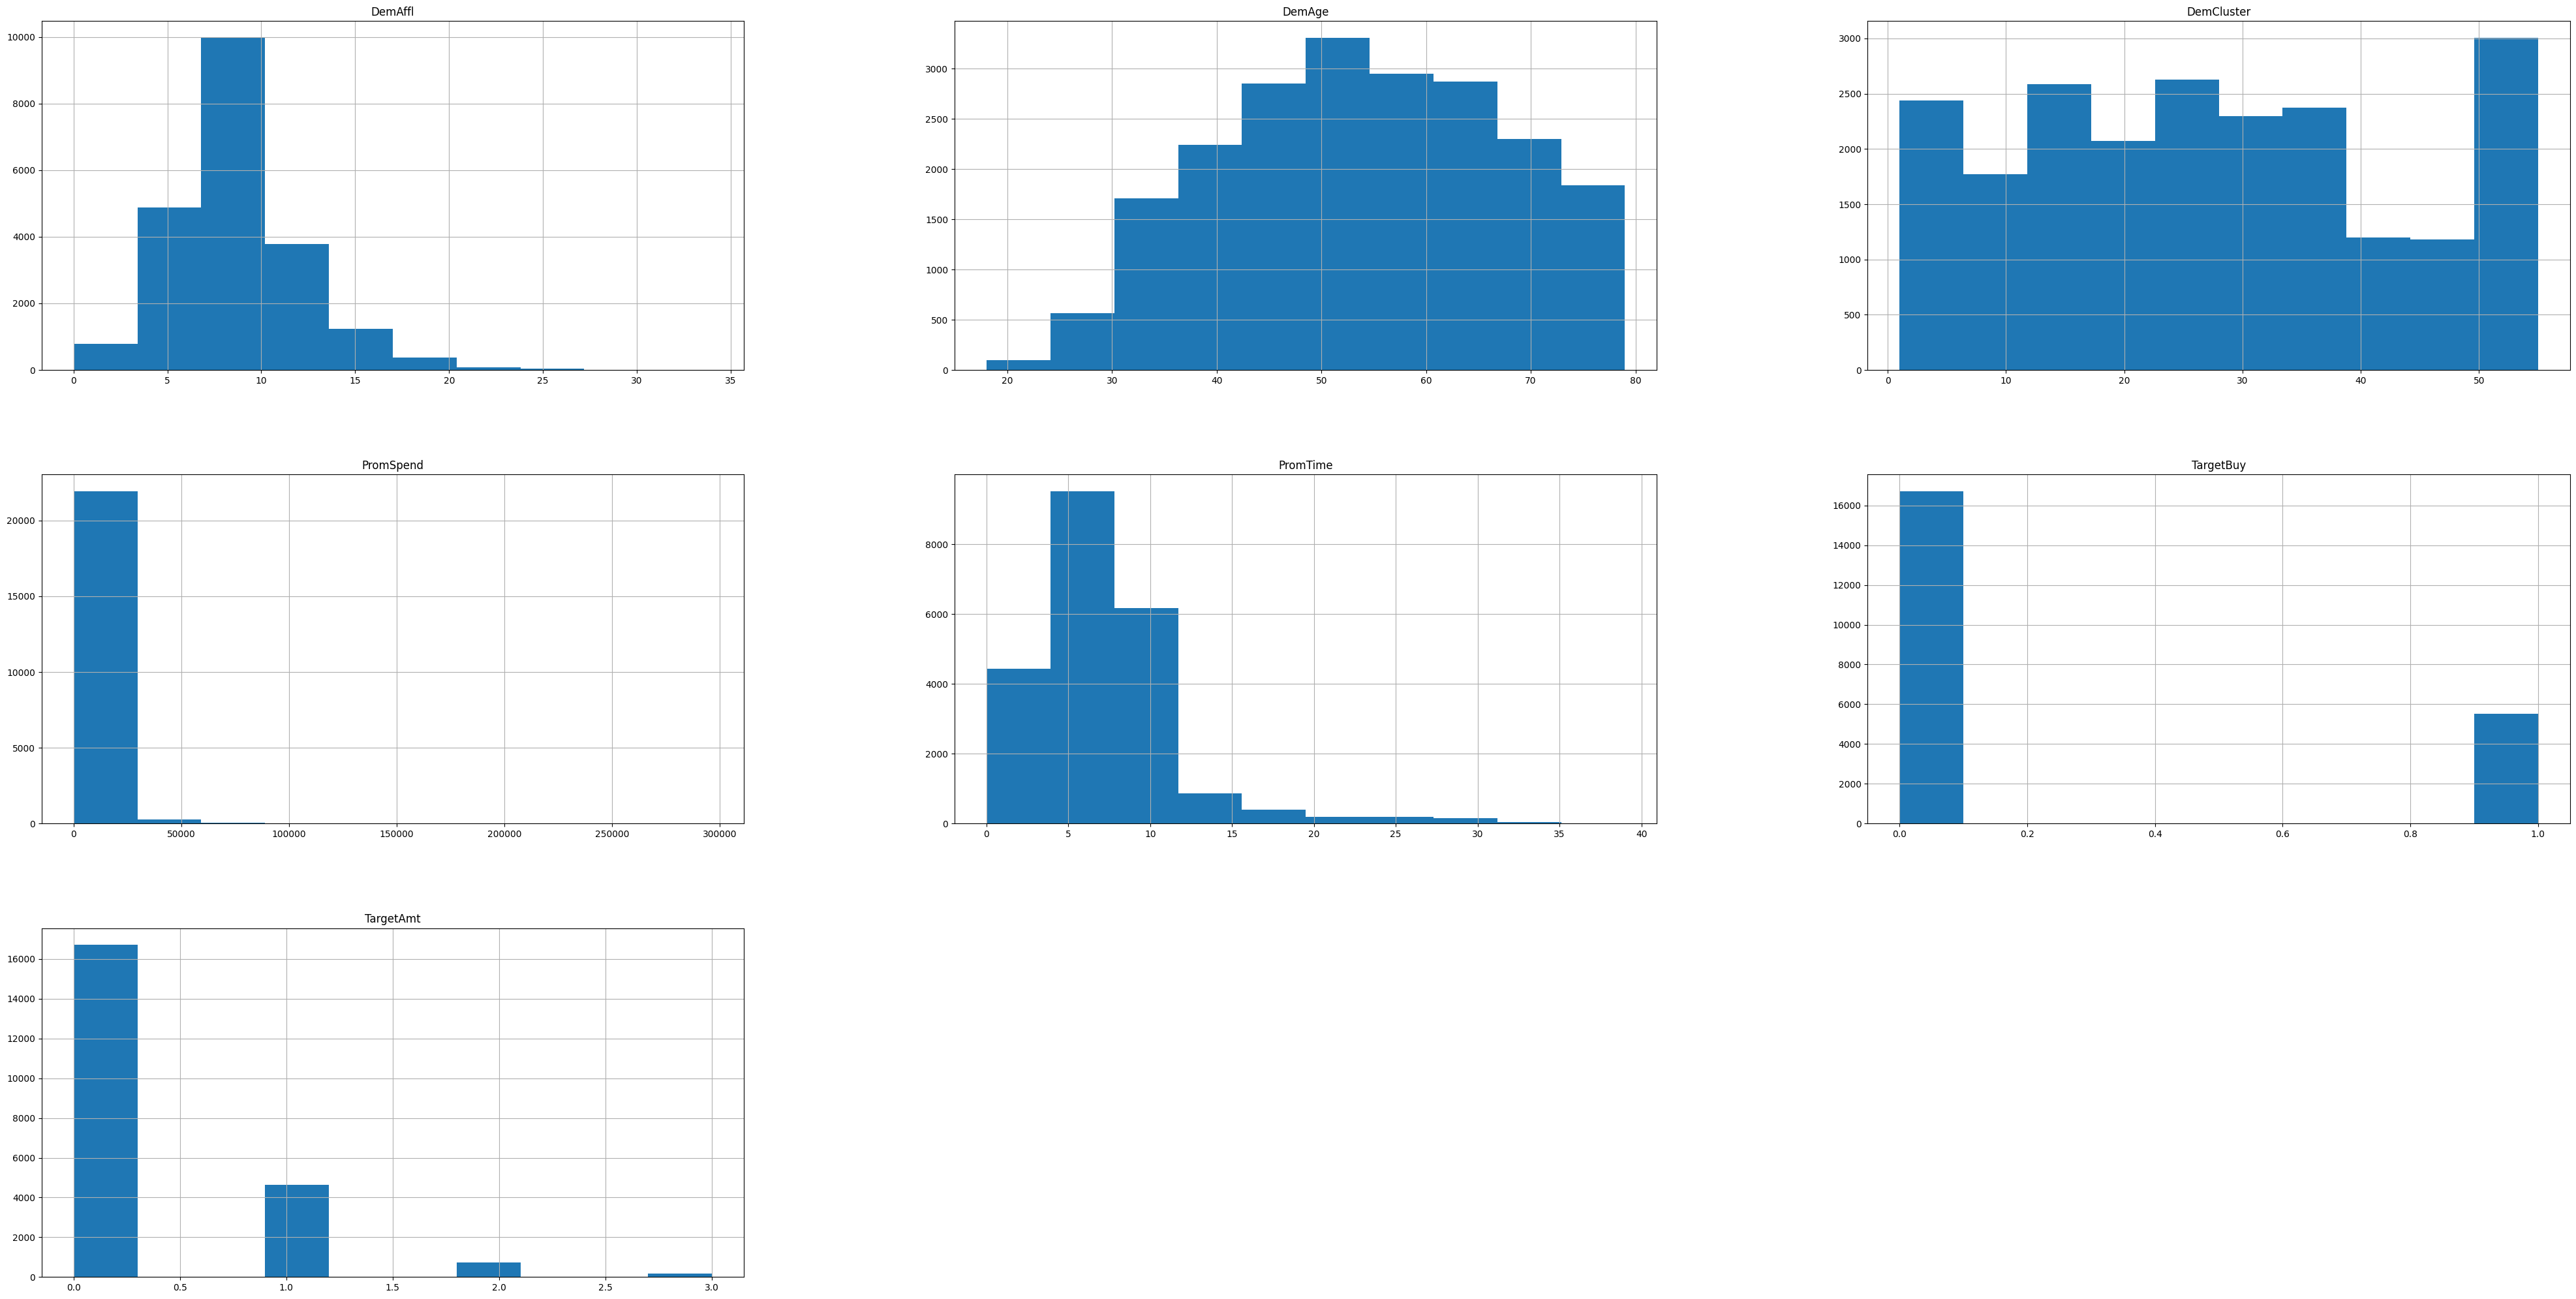

In [29]:
df1[numerical].hist(figsize=(50,25))

In [30]:
df1['DemAffl']=df1['DemAffl'].fillna(df1['DemAffl'].mean())
df1['DemAge']=df1['DemAge'].fillna(df1['DemAge'].mean())
df1['DemCluster']=df1['DemCluster'].fillna(df1['DemCluster'].mean())
df1['PromTime']=df1['PromTime'].fillna(df1['PromTime'].median())

In [31]:
df1[numerical].isnull().sum()

DemAffl       0
DemAge        0
DemCluster    0
PromSpend     0
PromTime      0
TargetBuy     0
TargetAmt     0
dtype: int64

In [32]:
df1[categorical].isnull().sum()

DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
dtype: int64

In [33]:
df1[categorical]=df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [34]:
df1[categorical].isnull().sum()

DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
dtype: int64

In [35]:
df1.isnull().values.any()

False